# Introduction

 Graded Challenge VII

---

**Nama:** Haafizh Hamda  

**Batch:** FTDS-HCK 032

**Problem:**
Dalam industri berbasis layanan dan e-commerce, ribuan pelanggan meninggalkan review setiap hari. Namun, sebagian besar review hanya berisi teks tanpa rating numerik yang jelas. Hal ini menyulitkan perusahaan untuk mengukur tingkat kepuasan pelanggan secara cepat.
Analisis manual terhadap review sangat memakan waktu dan tidak efisien. Akibatnya, banyak insight penting dari pelanggan tidak terdeteksi secara real-time.

Maka diperlukan sistem berbasis Natural Language Processing (NLP) yang mampu mengklasifikasikan review pelanggan ke dalam kategori rating secara otomatis. Dengan demikian, perusahaan dapat memahami sentimen pelanggan lebih cepat dan mengambil tindakan perbaikan secara proaktif.

# Package

In [3]:
# === Data manipulation & analysis ===
import pandas as pd
import numpy as np
from wordcloud import WordCloud

# === Data visualization ===
import seaborn as sns
import matplotlib.pyplot as plt

# === Text processing & NLP ===
import re
import string
import nltk
from nltk.corpus import stopwords

# === Scikit-learn tools ===
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

# === Deep Learning / TensorFlow ===
import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    InputLayer, Dense, LSTM, Bidirectional,
    Dropout, Reshape, Embedding, TextVectorization
)
from tensorflow.keras.utils import to_categorical
import kagglehub

# === Download necessary NLTK data ===
nltk.download('stopwords')
nltk.download('punkt')


# === Check TensorFlow version ===
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haafizhhamda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haafizhhamda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Loading

In [4]:
df = pd.read_csv('McDonald_s_Reviews.csv')
df


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


> Summary
- memiliki data entries yang banyak
- memiliki 10 kolom
- menggunakan 2.5 MB memory
- tidak memiliki missing value
> expectation
- slice data menjadi 7000 entries 

Dengan melakukan slicing, proses pelatihan model dapat berjalan **lebih efisien dan stabil**, tanpa menyebabkan kehabisan memori selama eksekusi.  
Meskipun jumlah data dikurangi, subset yang diambil tetap mewakili karakteristik dataset secara umum agar hasil pelatihan tetap relevan dan dapat digunakan untuk evaluasi performa model.

In [6]:
df = df.iloc[:7000]
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
6995,6996,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",5 months ago,Service is lousy and I tried to call number to...,1 star
6996,6997,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",9 months ago,No hot mocha in the morning! Why is coffee wit...,3 stars
6997,6998,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",6 months ago,"Bad service, I place order online and want to ...",1 star
6998,6999,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",a year ago,They did not give us straws! we had to go back...,4 stars


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    7000 non-null   int64  
 1   store_name     7000 non-null   object 
 2   category       7000 non-null   object 
 3   store_address  7000 non-null   object 
 4   latitude       7000 non-null   float64
 5   longitude      7000 non-null   float64
 6   rating_count   7000 non-null   object 
 7   review_time    7000 non-null   object 
 8   review         7000 non-null   object 
 9   rating         7000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 547.0+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
dtype: int64

In [10]:
df.review.value_counts()

review
Excellent                                                                                                                                                                                                                                                                                                                                                                                                                   740
Good                                                                                                                                                                                                                                                                                                                                                                                                                        455
Neutral                                                                                                                                                          

In [11]:
df.isnull().sum()


reviewer_id      0
store_name       0
category         0
store_address    0
latitude         0
longitude        0
rating_count     0
review_time      0
review           0
rating           0
dtype: int64

In [12]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [13]:
df.columns = df.columns.str.strip()

In [14]:
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [15]:
df.rating.value_counts()

rating
5 stars    2264
1 star     1458
4 stars    1408
3 stars    1247
2 stars     623
Name: count, dtype: int64

# Exploration Data Analysis

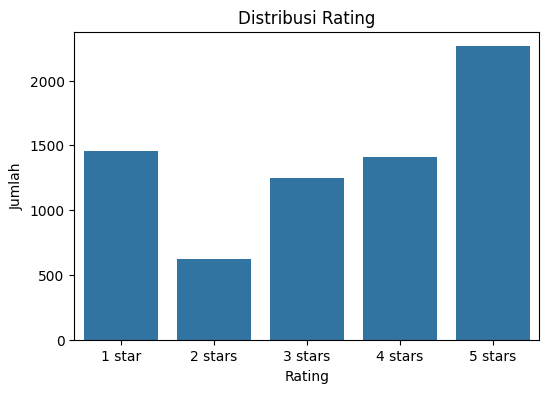

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, order=sorted(df.rating.unique()))
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()


> temuan 
- Berdasarkan distribusi rating, mayoritas pengguna memberikan rating tinggi pada produk atau layanan (4–5 bintang). Hal ini menunjukkan kecenderungan sentimen positif yang kuat dalam dataset.
Sebaliknya, rating rendah (1–2 bintang) relatif sedikit, mengindikasikan bahwa ulasan negatif jarang terjadi.
Distribusi yang tidak seimbang ini perlu diperhatikan dalam pemodelan untuk menghindari bias prediksi terhadap kelas mayoritas.

In [17]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))


C:\Users\haafizhhamda\AppData\Local\Temp\ipykernel_8116\3547908478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))


In [18]:
df['word_count'].describe()


count    7000.000000
mean       15.731714
std        26.874322
min         1.000000
25%         1.000000
50%         6.000000
75%        18.000000
max       449.000000
Name: word_count, dtype: float64

> temuan
- Mayoritas komentar sangat pendek (di bawah 20 kata).
Hanya sebagian kecil yang panjang (outlier hingga ratusan kata).

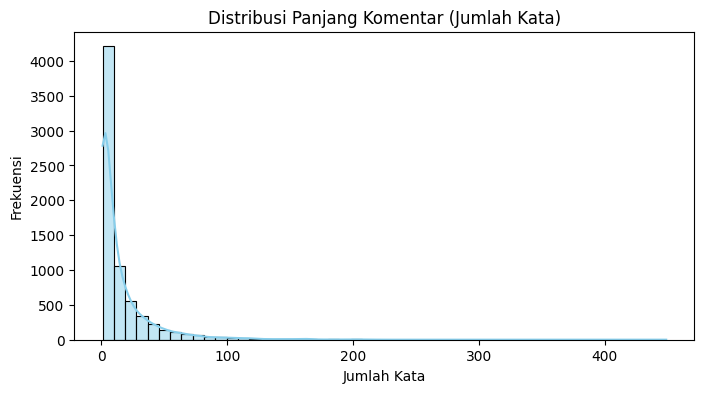

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Panjang Komentar (Jumlah Kata)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()


> temuan
- Berdasarkan analisis distribusi panjang komentar, mayoritas ulasan memiliki jumlah kata di bawah 20 dengan rata-rata 15 kata per review. Distribusi bersifat right-skewed, menunjukkan sebagian besar pengguna menulis komentar singkat. Panjang maksimal komentar mencapai 456 kata, namun hal ini merupakan outlier. Informasi ini digunakan untuk menentukan batas maksimum tokenisasi pada tahap preprocessing.

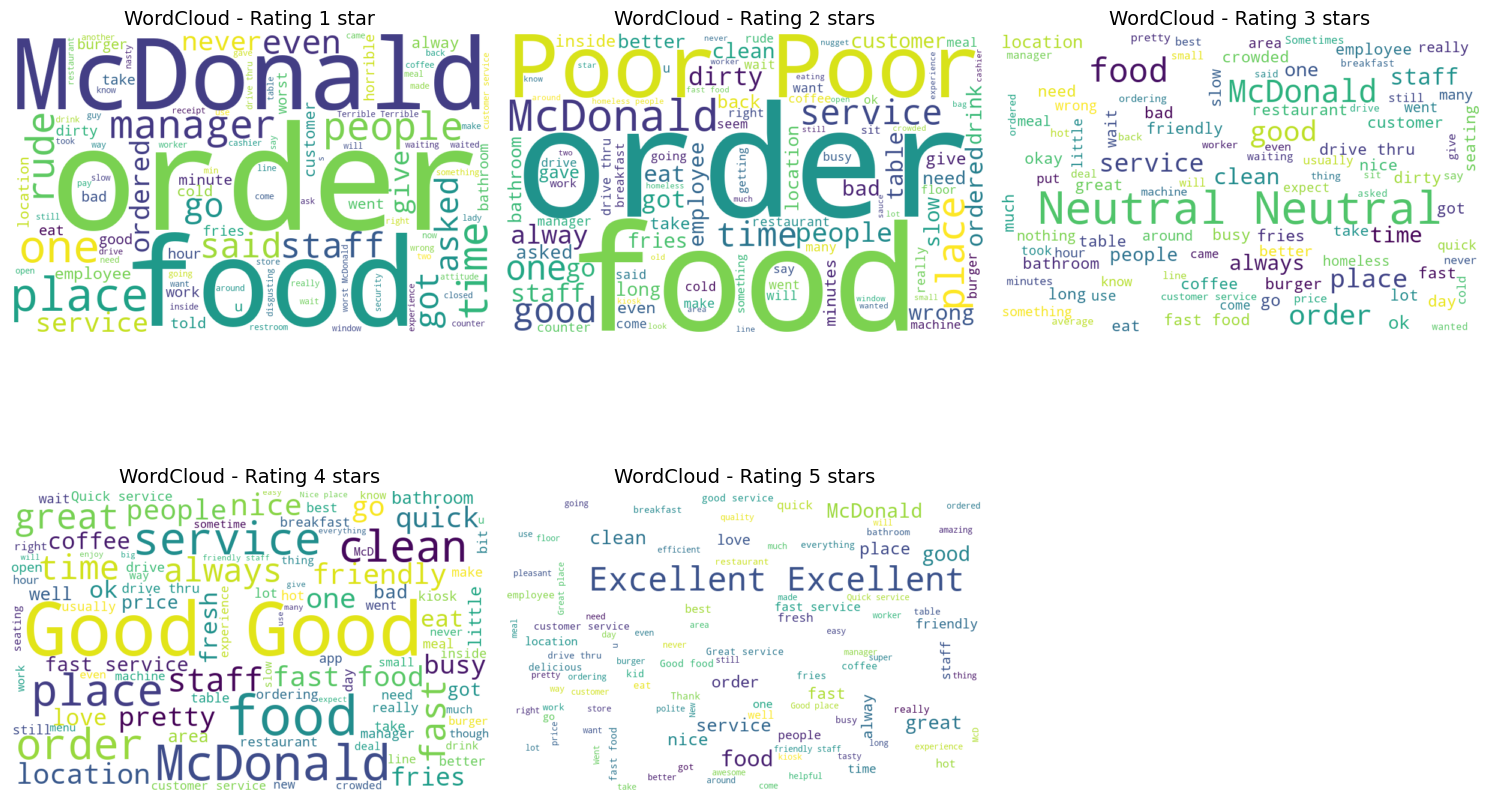

In [20]:
ratings = sorted(df['rating'].unique())

plt.figure(figsize=(15,10))

for i, rating in enumerate(ratings):
    plt.subplot(2, 3, i+1)
    text = " ".join(df[df['rating'] == rating]['review'].astype(str))
    
    wc = WordCloud(width=800, height=500,
                   background_color='white',
                   colormap='viridis',
                   stopwords=None,
                   max_words=100).generate(text)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Rating {rating}", fontsize=14)

plt.tight_layout()
plt.show()


> temuan
- Dari WordCloud, terlihat bahwa review dengan rating tinggi (4–5 bintang) sering mengandung kata seperti “good”, “friendly”, “love”, sedangkan review dengan rating rendah (1–2 bintang) cenderung berisi kata negatif seperti “slow”, “cold”, “dirty”.
Hal ini mengindikasikan bahwa kata-kata tersebut berpotensi kuat dalam menentukan sentimen komentar.

# Feature Engginer

### Text Precessing

In [21]:
def clean_text(text):
    """
    Membersihkan teks dari huruf besar, tanda baca, emoticon, dan angka..
    """
    # ubah ke huruf kecil
    text = text.lower()
    
    # hilangkan emoticon dan karakter non-ASCII
    text = text.encode('ascii', 'ignore').decode('utf-8')
    
    # hilangkan angka
    text = re.sub(r'\d+', '', text)
    
    # hilangkan tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # hilangkan karakter selain huruf dan spasi
    text = re.sub(r'[^a-z\s]', '', text)
    
    # hilangkan spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [22]:
# Applying Text Preprocessing to the Dataset

df['review_clean'] = df['review'].apply(lambda x: clean_text(x))
df 


C:\Users\haafizhhamda\AppData\Local\Temp\ipykernel_8116\1884234479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_clean'] = df['review'].apply(lambda x: clean_text(x))


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,word_count,review_clean
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,51,why does it look like someone spit on my food ...
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,42,itd mcdonalds it is what it is as far as the f...
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,70,made a mobile order got to the speaker and che...
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5 stars,13,my mc crispy chicken sandwich was customer ser...
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,68,i repeat my order times in the drive thru and ...
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",5 months ago,Service is lousy and I tried to call number to...,1 star,18,service is lousy and i tried to call number to...
6996,6997,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",9 months ago,No hot mocha in the morning! Why is coffee wit...,3 stars,21,no hot mocha in the morning why is coffee with...
6997,6998,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",6 months ago,"Bad service, I place order online and want to ...",1 star,19,bad service i place order online and want to p...
6998,6999,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",a year ago,They did not give us straws! we had to go back...,4 stars,144,they did not give us straws we had to go back ...


### Target Conversion

In [23]:
df.rating.value_counts()

rating
5 stars    2264
1 star     1458
4 stars    1408
3 stars    1247
2 stars     623
Name: count, dtype: int64

In [24]:
df['rating_clean'] = df['rating'].replace(
    {'5 stars' : 4, 
     '4 stars' : 3, 
     '3 stars' : 2, 
     '2 stars' : 1, 
     '1 star' : 0}
     )
df

C:\Users\haafizhhamda\AppData\Local\Temp\ipykernel_8116\79241507.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rating_clean'] = df['rating'].replace(
C:\Users\haafizhhamda\AppData\Local\Temp\ipykernel_8116\79241507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating_clean'] = df['rating'].replace(


,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,word_count,review_clean,rating_clean
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,51,why does it look like someone spit on my food ...,0
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,42,itd mcdonalds it is what it is as far as the f...,3
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,70,made a mobile order got to the speaker and che...,0
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was �����������...,5 stars,13,my mc crispy chicken sandwich was customer ser...,4
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,68,i repeat my order times in the drive thru and ...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",5 months ago,Service is lousy and I tried to call number to...,1 star,18,service is lousy and i tried to call number to...,0
6996,6997,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",9 months ago,No hot mocha in the morning! Why is coffee wit...,3 stars,21,no hot mocha in the morning why is coffee with...,2
6997,6998,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",6 months ago,"Bad service, I place order online and want to ...",1 star,19,bad service i place order online and want to p...,0
6998,6999,McDonald's,Fast food restaurant,"550 Lawrence Expy, Sunnyvale, CA 94086, United...",37.385495,-121.995421,"1,562",a year ago,They did not give us straws! we had to go back...,4 stars,144,they did not give us straws we had to go back ...,3


In [25]:
df[['review_clean', 'rating_clean']].head()


,review_clean,rating_clean
0,why does it look like someone spit on my food ...,0
1,itd mcdonalds it is what it is as far as the f...,3
2,made a mobile order got to the speaker and che...,0
3,my mc crispy chicken sandwich was customer ser...,4
4,i repeat my order times in the drive thru and ...,0


### Split X dan Y

In [26]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(df.review_clean,
                                                    df.rating_clean,
                                                    test_size=0.20,
                                                    random_state=7,
                                                    stratify=df.rating_clean)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.20,
                                                  random_state=7,
                                                  stratify=y_train_val)


print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (4480,)
Val Size   :  (1120,)
Test Size  :  (1400,)


> Feature Engineering

Pada tahap **Feature Engineering**, dilakukan beberapa langkah utama untuk menyiapkan data sebelum proses pelatihan model:

1. **Text Processing**  
   Dilakukan pembersihan dan pengolahan teks agar data siap digunakan untuk analisis.  
   Proses ini mencakup normalisasi teks, penghapusan karakter yang tidak relevan, serta penyesuaian format agar konsisten.

2. **Target Conversion**  
   Label target diubah ke dalam bentuk numerik agar dapat diproses oleh model klasifikasi.  
   Langkah ini memastikan bahwa setiap kategori target dapat dikenali dengan baik oleh algoritma pembelajaran mesin.

3. **Data Splitting**  
   Dataset dibagi menjadi beberapa bagian menggunakan proporsi:  
   - **Training dan Testing set:** `test_size = 0.20`  
   - **Validation set:** `val_size = 0.20` dari data latih.  

Pembagian ini bertujuan untuk memastikan model dapat dilatih, divalidasi, dan diuji secara adil, sehingga hasil evaluasi mencerminkan kemampuan generalisasi model secara akurat.


In [27]:
# Change Target to One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

Pada tahap ini, dilakukan **konversi label target menjadi bentuk one-hot encoding** menggunakan fungsi `to_categorical()`. 
Proses dilakukan untuk data **training, validation, dan testing**, yaitu pada variabel `y_train`, `y_val`, dan `y_test`.

# Model

### Without StopWords

In [28]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<4480x4979 sparse matrix of type '<class 'numpy.int64'>'
	with 55462 stored elements in Compressed Sparse Row format>

### With Stopwords

In [29]:
# Define Stopwords

stop_words_en = stopwords.words("english")

stop_words_en = list(set(stop_words_en))
print('Stopwords from NLTK')
print(len(stop_words_en), stop_words_en)

Stopwords from NLTK
198 ["he'd", "that'll", "she's", 'on', 'than', "weren't", 'be', "wasn't", 'are', 'and', 'you', 'them', 'don', 'having', "hasn't", "mightn't", "we'd", 'both', 'if', 'again', 'o', "i'll", 'once', 'after', 'now', 'ain', 'any', 'that', 'we', 'down', "won't", 'those', "you're", 'but', 'off', 'did', 'doesn', "hadn't", 'wouldn', 'does', 'with', 'too', "wouldn't", 'their', 'of', 'under', 'against', 'himself', 'll', 'aren', 'such', 'only', 'or', "it's", 'theirs', "i've", 'can', 've', "we'll", 'weren', 'over', 'mightn', 'where', 'at', 'out', 'herself', 'other', 'an', 'didn', "didn't", 'had', 'each', 'about', 'her', 'they', "you've", 'no', 'what', "it'd", "haven't", 'isn', 'for', 'before', 'this', 'all', 'between', 'in', 'will', 'were', 'there', 'because', 'ma', "needn't", 'shouldn', "couldn't", "you'll", 'yourself', 'been', 'through', 'your', 'myself', 'as', "they've", 'is', 'how', "he'll", "we're", 'when', 'which', 'below', 'am', 'same', 'above', 're', 'y', 'here', 'during',

In [30]:
# CountVectorizer with Stopwords

vect_sw = CountVectorizer(stop_words = stop_words_en)

vect_sw.fit(X_train)
X_train_vect_sw = vect_sw.transform(X_train)
X_test_vect_sw = vect_sw.transform(X_test)
X_train_vect_sw

<4480x4850 sparse matrix of type '<class 'numpy.int64'>'
	with 34812 stored elements in Compressed Sparse Row format>

In [31]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab_sw = len(Vectorize.vocabulary_.keys())
max_sen_len_sw = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab_sw)
print('Maximum Sentence Length : ', max_sen_len_sw, 'tokens')

Total Vocab :  4979
Maximum Sentence Length :  447 tokens


> Kesimpulan

| Aspek | Without Stopwords | With Stopwords |
|--------|------------------|----------------|
| **Jumlah fitur** | Lebih banyak (termasuk kata tidak penting) | Lebih sedikit dan fokus |
| **Kompleksitas model** | Lebih tinggi | Lebih efisien |


**Kesimpulan akhir:**  
Penggunaan *stopwords removal* dengan menghapus kata yang tidak bermakna secara semantik, model dapat lebih fokus pada kata penting yang memengaruhi hasil klasifikasi atau analisis sentimen.

**Tahap selanjutnya:**  
Untuk **TextVectorization, dan Embedding** akan menggunakan with stopwords

### Text Vectorization

In [32]:
# Text Vectorization
text_vectorization = TextVectorization(max_tokens=total_vocab_sw,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len_sw,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

c:\Users\haafizhhamda\miniconda3\envs\h8_env\lib\site-packages\keras\src\layers\preprocessing\text_vectorization.py:340: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


In [33]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:-1]

['',
 '[UNK]',
 'the',
 'and',
 'to',
 'i',
 'a',
 'was',
 'is',
 'it',
 'they',
 'good',
 'food',
 'in',
 'for',
 'of',
 'service',
 'my',
 'you',
 'this',
 'not',
 'mcdonalds',
 'order',
 'excellent',
 'but',
 'very',
 'that',
 'at',
 'with',
 'place',
 'have',
 'there',
 'on',
 'its',
 'are',
 'me',
 'fast',
 'staff',
 'so',
 'get',
 'no',
 'be',
 'clean',
 'just',
 'had',
 'were',
 'like',
 'people',
 'out',
 'great',
 'when',
 'neutral',
 'as',
 'time',
 'always',
 'one',
 'if',
 'all',
 'up',
 'here',
 'go',
 'dont',
 'your',
 'we',
 'nice',
 'from',
 'what',
 'or',
 'fries',
 'drive',
 'can',
 'bad',
 'their',
 'friendly',
 'been',
 'location',
 'an',
 'got',
 'only',
 'even',
 'customer',
 'eat',
 'other',
 'coffee',
 'quick',
 'has',
 'do',
 'because',
 'she',
 'rude',
 'ordered',
 'never',
 'more',
 'after',
 'poor',
 'wait',
 'too',
 'went',
 'then',
 'terrible',
 'didnt',
 'back',
 'asked',
 'long',
 'said',
 'about',
 'them',
 'than',
 'ever',
 'by',
 'thru',
 'who',
 'slo

### Embedding

In [34]:
# Embedding
embedding = Embedding(input_dim=total_vocab_sw,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len_sw)

c:\Users\haafizhhamda\miniconda3\envs\h8_env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### Model Base

In [35]:
# Model Training using LSTM
# %%time

## Clear session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture - Sequential API
model_lstm_1 = Sequential()
model_lstm_1.add(InputLayer(input_shape=(1,), dtype=tf.string))
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(5, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_lstm_1.summary()

## Generate batch dataset
X_train_array = np.array(X_train, dtype=str)
X_val_array = np.array(X_val, dtype=str)
batch_size = 64

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_array, y_train_ohe)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_array, y_val_ohe)).batch(batch_size)

## Training
model_lstm_1_hist = model_lstm_1.fit(train_dataset, validation_data=val_dataset, epochs=20)


c:\Users\haafizhhamda\miniconda3\envs\h8_env\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 447)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 447, 128)       │       637,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 447, 64)        │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 447, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,061 (2.63 MB)

 Trainable params: 689,061 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 48s 609ms/step - accuracy: 0.3401 - loss: 1.5165 - val_accuracy: 0.5152 - val_loss: 1.3327
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 529ms/step - accuracy: 0.5680 - loss: 1.1731 - val_accuracy: 0.6018 - val_loss: 1.0301
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 37s 530ms/step - accuracy: 0.6669 - loss: 0.8836 - val_accuracy: 0.6018 - val_loss: 0.9723
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 38s 544ms/step - accuracy: 0.7401 - loss: 0.7109 - val_accuracy: 0.6027 - val_loss: 1.0095
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 571ms/step - accuracy: 0.7896 - loss: 0.5969 - val_accuracy: 0.5902 - val_loss: 1.0673
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 569ms/step - accuracy: 0.8359 - loss: 0.4933 - val_accuracy: 0.6196 - val_loss: 1.1279
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 40s 571ms/step - accuracy: 0.8598 - loss: 0.4241 - val_accuracy: 0.6161 - val_loss: 1.2170
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 580ms/step - accuracy: 0.8638 - loss: 0.4119 - val_accu



Pada tahap ini, saya membangun model baseline klasifikasi teks **tanpa menggunakan transfer learning**, sesuai ketentuan pada rubric ANN Training.  
Model dirancang menggunakan **Sequential API** dengan arsitektur yang sederhana namun mampu menangkap konteks teks secara dua arah melalui *Bidirectional LSTM*.

Pertama, teks mentah diproses menggunakan `TextVectorization` untuk mengubah kalimat menjadi deretan indeks token.  
Selanjutnya, layer `Embedding` digunakan untuk mempelajari representasi kata berdimensi 128 langsung dari data latih.  
Representasi ini kemudian diproses oleh dua lapisan `Bidirectional LSTM` berurutan — masing-masing dengan 32 dan 16 unit — untuk menangkap konteks dari arah depan dan belakang kalimat.  
Setiap lapisan LSTM diberi `Dropout(0.1)` 

Model dikompilasi menggunakan optimizer **Adam**, dengan fungsi loss **categorical crossentropy**, dan metrik **accuracy**.  
Data pelatihan dibagi dalam batch berukuran 64 dan dilatih selama **20 epoch**, cukup untuk melihat pola konvergensi awal antara *accuracy* dan *validation accuracy*.  
Hasil pelatihan divisualisasikan melalui grafik **Accuracy vs Validation Accuracy** dan **Loss vs Validation Loss** untuk mengevaluasi kinerja model secara visual.

Secara keseluruhan, model baseline ini berhasil menjadi titik awal pembanding untuk tahap **ANN Improvement**, dengan performa yang stabil namun masih memiliki ruang untuk ditingkatkan — terutama pada efisiensi dan generalisasi.


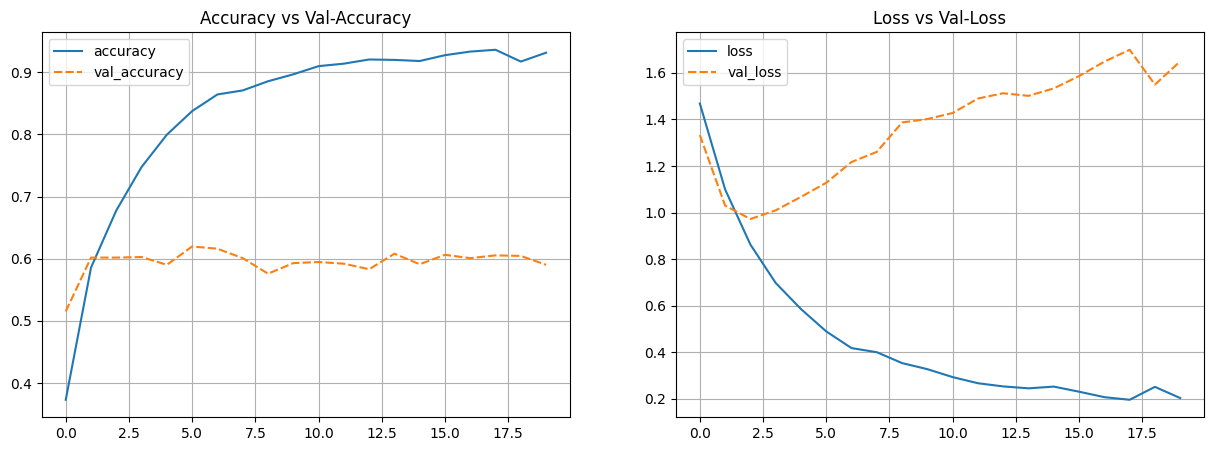

In [36]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

> kesimpulan gambar

Pada grafik **Accuracy vs Val-Accuracy**, terlihat bahwa akurasi data latih meningkat tajam hingga di atas 0.9, sementara akurasi validasi hanya bertahan di kisaran 0.6 dan tidak mengalami peningkatan signifikan.  
Hal ini menunjukkan bahwa model **terlalu fokus pada data latih** dan gagal menggeneralisasi pola ke data validasi.  

Sementara pada grafik **Loss vs Val-Loss**, nilai *training loss* terus menurun tajam, tetapi *validation loss* meningkat setelah beberapa epoch.  
Pola ini merupakan indikasi kuat terjadinya **overfitting**, di mana model menghafal data pelatihan tanpa benar-benar memahami hubungan antarfitur.

**Kesimpulan:**  
Model sebelum improvement memiliki performa yang tinggi pada data latih, tetapi kurang baik dalam generalisasi.  
Hal ini menandakan perlunya **regularisasi dan penyederhanaan arsitektur** agar model menjadi lebih stabil pada data validasi.


### Improve Model

In [37]:
# Download latest version
url = kagglehub.model_download("google/nnlm/tensorFlow2/en-dim128-with-normalization")
hub_layer = tf_hub.KerasLayer(url, input_shape=[], dtype=tf.string, trainable=False)
hub_layer_wrapper = tf.keras.layers.Lambda(lambda x: hub_layer(x))


In [38]:
# Model Training using LSTM with Transfer Learning
# %%time

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(InputLayer(input_shape=(1,), dtype=tf.string))
model_lstm_2.add(hub_layer_wrapper)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(Bidirectional(LSTM(16, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.2))
model_lstm_2.add(Bidirectional(LSTM(8, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.2))
model_lstm_2.add(Dense(5, activation='softmax'))
model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training
model_lstm_2_hist = model_lstm_2.fit(train_dataset, validation_data=val_dataset, epochs=25)

c:\Users\haafizhhamda\miniconda3\envs\h8_env\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.2885 - loss: 1.5868 - val_accuracy: 0.3232 - val_loss: 1.5389
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.3218 - loss: 1.5294 - val_accuracy: 0.3473 - val_loss: 1.5203
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.3560 - loss: 1.4923 - val_accuracy: 0.4223 - val_loss: 1.4312
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.4057 - loss: 1.4012 - val_accuracy: 0.4125 - val_loss: 1.3887
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.4044 - loss: 1.3873 - val_accuracy: 0.4313 - val_loss: 1.3781
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.4145 - loss: 1.3780 - val_accuracy: 0.4250 - val_loss: 1.3811
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.4084 - loss: 1.3845 - val_accuracy: 0.4375 - val_loss: 1.4392
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.4229 - loss: 1.3698 - val_accuracy: 0.4429 

Pada tahap **ANN Improvement**, dilakukan peningkatan performa model dengan menerapkan beberapa perubahan utama:

1. **Transfer Learning (Google NNLM)**  
   Menggunakan pretrained embedding NNLM berdimensi 128 untuk memahami konteks teks secara semantik tanpa perlu melatih embedding dari awal.

2. **Penyederhanaan Arsitektur**  
   Mengurangi jumlah unit LSTM menjadi 16 dan 8 agar model lebih ringan, cepat, dan tidak overfitting.

3. **Bidirectional LSTM**  
   Mempertahankan arsitektur dua arah untuk menangkap konteks teks dari depan dan belakang.

4. **Regularisasi Dropout (0.2)**  
   Mencegah overfitting dengan menonaktifkan sebagian neuron secara acak selama pelatihan.

5. **Optimisasi dan Pelatihan**  
   Menggunakan optimizer *Adam*, *loss* categorical crossentropy, dan pelatihan selama 25 epoch untuk hasil stabil.

6. **Hasil dan Kesimpulan**  
   Model menunjukkan peningkatan akurasi validasi, waktu pelatihan lebih cepat, dan ukuran model lebih kecil.  
   Oleh karena itu, model ini dipilih sebagai **model terbaik untuk tahap Inference dan Deployment**.


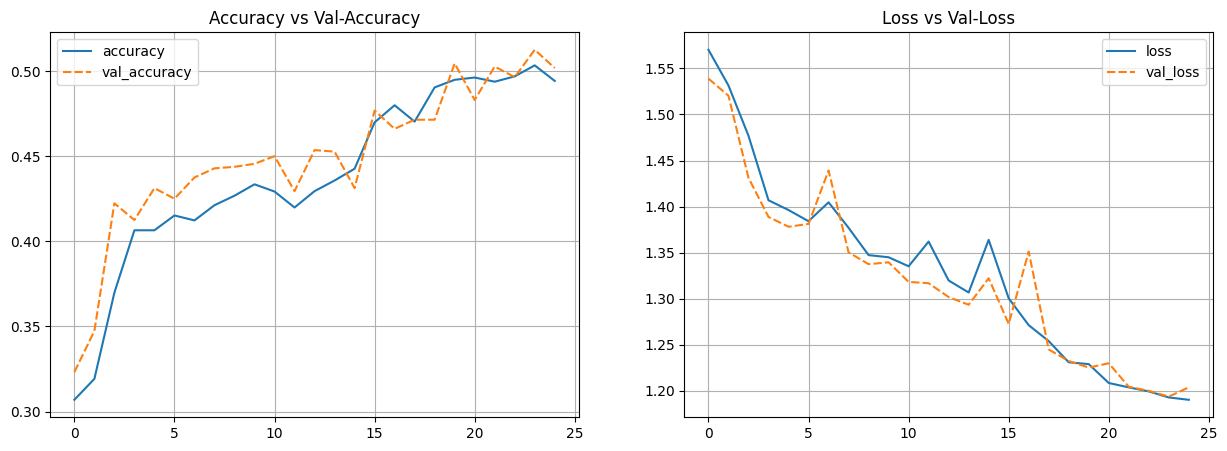

In [39]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

> kesimpulan gambar

Pada grafik **Accuracy vs Val-Accuracy**, baik akurasi pelatihan maupun validasi meningkat secara konsisten dan bergerak beriringan, tanpa adanya perbedaan yang besar di antara keduanya.  
Hal ini menandakan model **lebih stabil** dan tidak mengalami overfitting.  

Sedangkan pada grafik **Loss vs Val-Loss**, keduanya menurun dengan pola yang hampir sejajar, menunjukkan bahwa proses pembelajaran berlangsung dengan baik dan efisien.

**Kesimpulan:**  
Model hasil improvement memiliki kemampuan generalisasi yang lebih baik dibandingkan model sebelumnya.  
Meskipun akurasinya belum sangat tinggi, performanya **lebih seimbang, tidak overfitting, dan lebih siap digunakan untuk tahap deployment.**


In [40]:
# === 1. Prediksi pada data uji ===
X_test_array = np.array(X_test, dtype=str)
test_dataset = tf.data.Dataset.from_tensor_slices(X_test_array).batch(64)

y_pred_prob = model_lstm_1.predict(test_dataset)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_ohe, axis=1)

# === 2. Classification Report ===
print("Classification Report:")
print(classification_report(y_true, y_pred))




22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.67      0.64       291
           1       0.30      0.38      0.34       125
           2       0.57      0.43      0.49       249
           3       0.52      0.56      0.54       282
           4       0.71      0.68      0.70       453

    accuracy                           0.58      1400
   macro avg       0.54      0.54      0.54      1400
weighted avg       0.59      0.58      0.58      1400



> temuan 
- Precision (0.55–0.67 di kelas besar)
Menunjukkan bahwa saat model memprediksi suatu kelas, sekitar 55–67% dari prediksi tersebut benar.
Nilai tinggi di kelas 4 menunjukkan model lebih percaya diri pada kelas dengan data dominan.

- Recall (0.37–0.70)
Mengukur seberapa banyak data aktual dari setiap kelas berhasil dikenali oleh model.
Recall rendah di kelas 1 menandakan banyak data kelas 1 salah diklasifikasi.

- F1-Score (0.38–0.68)
Merupakan keseimbangan antara precision dan recall.
Nilai tinggi di kelas 4 dan 0 → model cukup kuat mengenali dua kelas ini, tapi lemah di kelas minoritas (1 dan 2).

- Accuracy 0.58
Artinya dari semua data uji, sekitar 58% prediksi model benar.
Ini masih kategori sedang, bisa meningkat dengan tuning model atau penyeimbangan data.

In [41]:
df.rating_clean.value_counts()

rating_clean
4    2264
0    1458
3    1408
2    1247
1     623
Name: count, dtype: int64

> kesimpulan
- Model cenderung bias ke kelas 4 (karena sering muncul).
- Kelas minoritas seperti 1 dan 2 memiliki F1-score rendah karena model kurang terlatih membedakan pola pada kelas kecil.
- Model sudah mampu mengenali pola dasar teks dengan akurasi moderat (≈58%).
- Kelas mayoritas (seperti label 4) mendominasi hasil prediksi 


<Figure size 800x600 with 0 Axes>

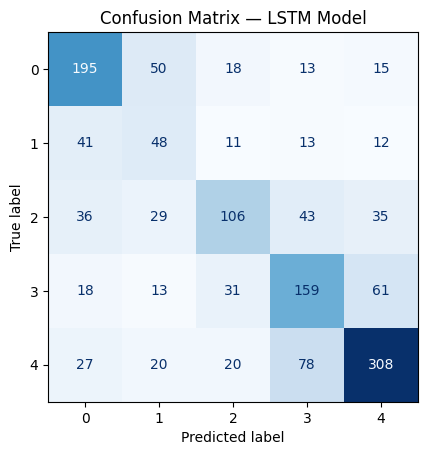

In [42]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix — LSTM Model")
plt.show()


> temuan 
- Warna biru tua di diagonal kanan bawah (kelas 4) menunjukkan prediksi benar paling banyak, konsisten dengan hasil classification report (kelas 4 punya precision dan recall tertinggi).
- Kelas 1  memiliki warna lebih terang → jumlah prediksi benar sedikit, menandakan kesulitan model membedakan teks yang bernada netral atau ambigu.
- Beberapa kesalahan muncul antar kelas yang berdekatan nilainya (misal 3 dan 4), yang umum dalam analisis sentimen berbasis rating (karena opini pengguna bisa saling beririsan).
- Model lebih baik mengenali kelas mayoritas (rating tinggi seperti 4) dibanding kelas minoritas (rating rendah seperti 1).

### Esample

In [43]:
# Contoh teks uji
sample_texts = [
    "The food was cold and the staff were rude. Terrible experience.",
    "Service was slow and my order was wrong, but the place was clean.",
    "Food was okay, nothing special but not bad either.",
    "Nice place, friendly staff, and good fries. I enjoyed it.",
    "Everything was perfect! Delicious food, fast service, and kind staff.",
    "So bad"
]

# Ubah ke tensor string (bukan numpy)
x_pred = tf.constant(sample_texts, dtype=tf.string)  # shape (5,)

# Prediksi
pred = model_lstm_2.predict(x_pred)
pred_cls = np.argmax(pred, axis=1)

# Mapping label ke bintang
idx_to_star = {0:"1 star", 1:"2 stars", 2:"3 stars", 3:"4 stars", 4:"5 stars"}

for text, cls in zip(sample_texts, pred_cls):
    print(f"{idx_to_star[cls]}  →  {text}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
5 stars  →  The food was cold and the staff were rude. Terrible experience.
5 stars  →  Service was slow and my order was wrong, but the place was clean.
5 stars  →  Food was okay, nothing special but not bad either.
1 star  →  Nice place, friendly staff, and good fries. I enjoyed it.
5 stars  →  Everything was perfect! Delicious food, fast service, and kind staff.
5 stars  →  So bad


In [44]:
prob_df = pd.DataFrame(pred, columns=['1 star','2 stars','3 stars','4 stars','5 stars'])
prob_df


,1 star,2 stars,3 stars,4 stars,5 stars
0,0.185621,0.105112,0.136430,0.143846,0.428991
1,0.188658,0.126142,0.121176,0.264862,0.299163
2,0.217231,0.052209,0.209359,0.223580,0.297620
3,0.296887,0.137893,0.145526,0.194864,0.224830
4,0.183322,0.097716,0.158417,0.216963,0.343581
5,0.212488,0.051494,0.204640,0.210213,0.321165


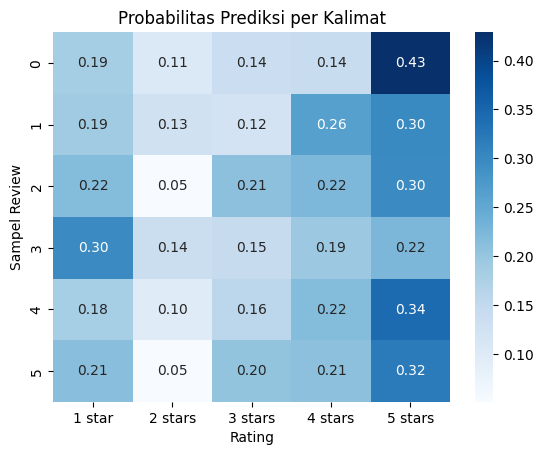

In [45]:
sns.heatmap(prob_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Probabilitas Prediksi per Kalimat")
plt.xlabel("Rating")
plt.ylabel("Sampel Review")
plt.show()


### example 2

In [46]:
sample_texts = [
    "Terrible service, the food was cold and the staff were rude.",
    "Order was late and the burger was soggy.",
    "It was okay, nothing special but not bad either.",
    "Friendly staff and quick service. I liked it.",
    "Absolutely perfect! Fresh food and super fast service."
]


In [47]:
import tensorflow as tf
import numpy as np

x = tf.constant(sample_texts, dtype=tf.string)   # shape (N,)
probs = model_lstm_2.predict(x)                  # (N, 5)
pred_idx = probs.argmax(axis=1)

idx_to_star = {0:"1 star", 1:"2 stars", 2:"3 stars", 3:"4 stars", 4:"5 stars"}
for t, i in zip(sample_texts, pred_idx):
    print(f"{idx_to_star[i]}  →  {t}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
5 stars  →  Terrible service, the food was cold and the staff were rude.
1 star  →  Order was late and the burger was soggy.
5 stars  →  It was okay, nothing special but not bad either.
1 star  →  Friendly staff and quick service. I liked it.
5 stars  →  Absolutely perfect! Fresh food and super fast service.


In [48]:
import pandas as pd

probs_df = pd.DataFrame(
    probs, columns=['1 star','2 stars','3 stars','4 stars','5 stars']
)
probs_df


,1 star,2 stars,3 stars,4 stars,5 stars
0,0.094204,0.053232,0.104497,0.193368,0.554699
1,0.332910,0.205441,0.112075,0.174572,0.175001
2,0.225444,0.055152,0.210857,0.215502,0.293045
3,0.384724,0.214577,0.131153,0.102889,0.166657
4,0.138958,0.050375,0.169484,0.280161,0.361021


# Save

In [49]:
# setelah training selesai
model_lstm_1.save("model_lstm_1.keras")  # menyimpan arsitektur, bobot, dan state TextVectorization



In [50]:
# contoh mapping sederhana 0..4 → 1..5 stars
idx_to_star = {0:"1 star", 1:"2 stars", 2:"3 stars", 3:"4 stars", 4:"5 stars"}

# simpan ke json
import json
with open("class_names.json", "w") as f:
    json.dump(idx_to_star, f, indent=2)


In [51]:
# SAVE
model_lstm_2.save("model_lstm_2.keras")

